### Project 3 EDA notebook 1

In [1]:
#imports

import pandas as pd 
import pandas_profiling
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Read in the training data

train_data = pd.read_csv('training_set_values', index_col=0)
train_data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3]:
#What does this data frame look like?

print(train_data.shape)
train_data.columns

(59400, 40)


Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

#### Just realized I am missing the "labels" information, need to join two csv files together

In [4]:
train_labels = pd.read_csv('training_set_labels', index_col=0)

In [5]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [6]:
train_df = pd.merge(train_labels, train_data, on=['id'])
train_df.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [7]:
#run a profile report
#train_df.profile_report()

In [8]:
#inspect data types, identify null values, and inspect the summary statistics for each column
# function via TDS
def proj_eda(df): 
    eda_df = {}
    eda_df['null_sum'] = df.isnull().sum()
    eda_df['null_pct'] = df.isnull().mean()
    eda_df['dtypes'] = df.dtypes
    eda_df['count'] = df.count()
    eda_df['mean'] = df.mean()
    eda_df['median'] = df.median()
    eda_df['min'] = df.min()
    eda_df['max'] = df.max()
    
    return pd.DataFrame(eda_df)
proj_eda(train_df)

,null_sum,null_pct,dtypes,count,mean,median,min,max
amount_tsh,0,0.000000,float64,59400,317.650385,0.000000,0,350000
basin,0,0.000000,object,59400,NaN,NaN,Internal,Wami / Ruvu
construction_year,0,0.000000,int64,59400,1300.652475,1986.000000,0,2013
date_recorded,0,0.000000,object,59400,NaN,NaN,2002-10-14,2013-12-03
district_code,0,0.000000,int64,59400,5.629747,3.000000,0,80
extraction_type,0,0.000000,object,59400,NaN,NaN,afridev,windmill
extraction_type_class,0,0.000000,object,59400,NaN,NaN,gravity,wind-powered
extraction_type_group,0,0.000000,object,59400,NaN,NaN,afridev,wind-powered
funder,3635,0.061195,object,55765,NaN,NaN,NaN,NaN
gps_height,0,0.000000,int64,59400,668.297239,369.000000,-90,2770


#### It looks like a lot of these columns are similar and/or duplicates. Going to create a smaller dataframe without repeats.

In [11]:
small_train = train_df[['id', 'status_group', 'amount_tsh', 
                        'extraction_type_class', 'quality_group', 'quantity_group','population',
                       'source_class', 'waterpoint_type', 'basin', 'management_group', 'payment',
                       'construction_year', 'region', 'region_code', 'longitude', 'latitude']]
small_train.shape

(59400, 17)

In [12]:
#many of these objects should be categories... let's change them
#small_train['status_group'] = small_train['status_group'].astype('category')
small_train['extraction_type_class'] = small_train['extraction_type_class'].astype('category')
small_train['quality_group'] = small_train['quality_group'].astype('category')
small_train['quantity_group'] = small_train['quantity_group'].astype('category')
small_train['source_class'] = small_train['source_class'].astype('category')
small_train['waterpoint_type'] = small_train['waterpoint_type'].astype('category')
small_train['basin'] = small_train['basin'].astype('category')
small_train['management_group'] = small_train['management_group'].astype('category')
small_train['payment'] = small_train['payment'].astype('category')
small_train['region'] = small_train['region'].astype('category')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set 

In [13]:
#how does that look?
small_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     59400 non-null  int64   
 1   status_group           59400 non-null  object  
 2   amount_tsh             59400 non-null  float64 
 3   extraction_type_class  59400 non-null  category
 4   quality_group          59400 non-null  category
 5   quantity_group         59400 non-null  category
 6   population             59400 non-null  int64   
 7   source_class           59400 non-null  category
 8   waterpoint_type        59400 non-null  category
 9   basin                  59400 non-null  category
 10  management_group       59400 non-null  category
 11  payment                59400 non-null  category
 12  construction_year      59400 non-null  int64   
 13  region                 59400 non-null  category
 14  region_code            59400 non-null 

In [14]:
#Let's do some categorical EDA
#function via TDS

def categorical_eda(df):
    """Given dataframe, generate EDA of categorical data"""
    print("To check: Unique count of non-numeric data")
    print(df.select_dtypes(include=['category']).nunique())
    #top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, palette='Blues')
        fig.set_xticklabels(rotation=90)
        plt.show()

To check: Unique count of non-numeric data
extraction_type_class     7
quality_group             6
quantity_group            5
source_class              3
waterpoint_type           7
basin                     9
management_group          5
payment                   7
region                   21
dtype: int64


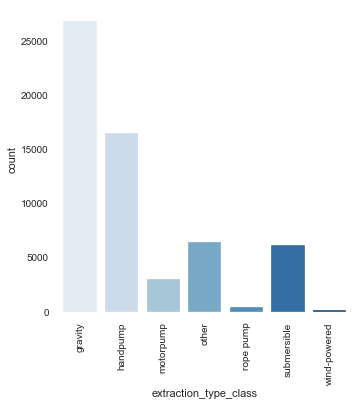

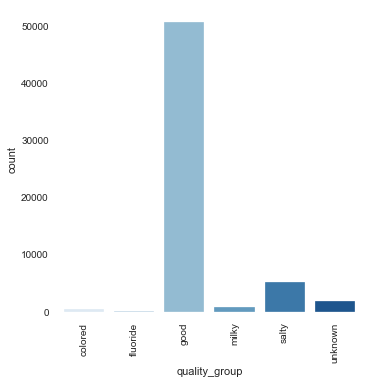

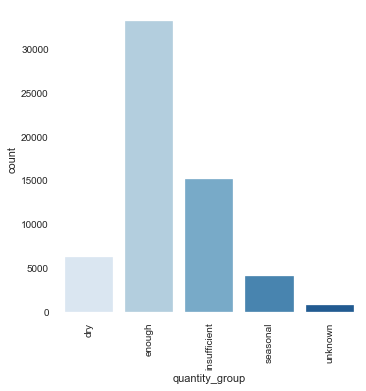

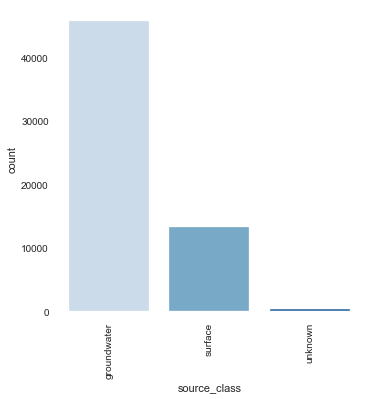

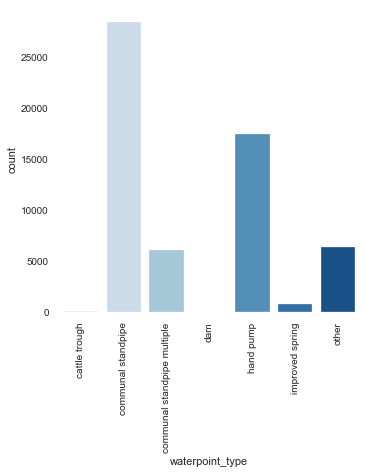

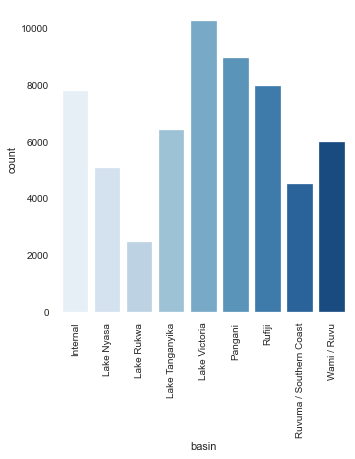

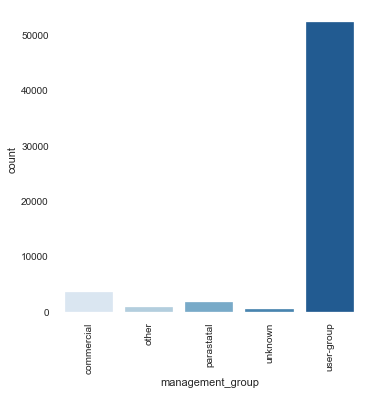

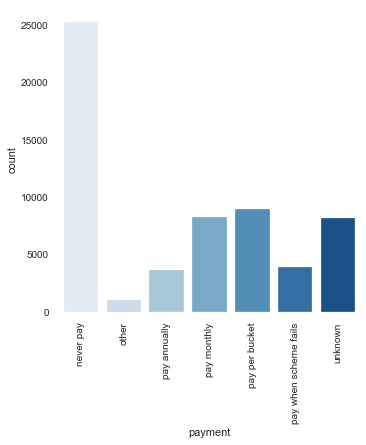

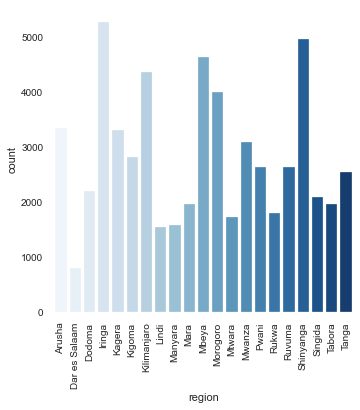

In [15]:
categorical_eda(small_train)

In [16]:
#Some one hot encoding is in order

ohe = OneHotEncoder()
dummies = ohe.fit_transform(small_train[['extraction_type_class', 'quality_group', 'quantity_group',
                                         'source_class', 'basin', 'management_group', 'payment', 'region']])

dummies_df = pd.DataFrame(dummies.todense(), columns=ohe.get_feature_names(),
                         index=small_train.index)
d_train_df = pd.concat([small_train[['id', 'status_group' ,'amount_tsh']], dummies_df], axis=1)
d_train_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 66 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          59400 non-null  int64  
 1   status_group                59400 non-null  object 
 2   amount_tsh                  59400 non-null  float64
 3   x0_gravity                  59400 non-null  float64
 4   x0_handpump                 59400 non-null  float64
 5   x0_motorpump                59400 non-null  float64
 6   x0_other                    59400 non-null  float64
 7   x0_rope pump                59400 non-null  float64
 8   x0_submersible              59400 non-null  float64
 9   x0_wind-powered             59400 non-null  float64
 10  x1_colored                  59400 non-null  float64
 11  x1_fluoride                 59400 non-null  float64
 12  x1_good                     59400 non-null  float64
 13  x1_milky                    594

In [17]:
#What does the data look like now?
d_train_df.shape

(59400, 66)

In [18]:
#Hello pandas profiling report! What can you tell us?
d_train_df.profile_report()

In [19]:
# Let's try a training model with Extraction Types and Source Class as features. Status Group is the target
y = d_train_df['status_group']
X = d_train_df[['x0_gravity', 'x0_handpump', 'x0_motorpump', 'x0_rope pump',
                'x0_submersible', 'x0_wind-powered', 'x0_other','x3_groundwater', 
                'x3_surface', 'x3_unknown']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
#Quick look at the y value counts.

y.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

##### about 54% functional. Not too much of a class imbalance... depending on how we handle the Needs Repair group.

#### Just to see what kind of ballpark we are playing in... going to run a dummy model at default settings

In [21]:
dummy_model = DummyClassifier(random_state=42)
dummy_model.fit(X_train, y_train)
# just grabbing the first 5000 to save space
dummy_model.predict(X_train)

array(['functional', 'non functional', 'non functional', ...,
       'functional', 'functional', 'functional'], dtype=object)

In [22]:
cross_val_score(dummy_model, X_train, y_train, cv=5)

array([0.44456912, 0.44500561, 0.44971942, 0.44853519, 0.43843305])

In [23]:
print(cross_val_score(dummy_model, X_train, y_train, cv=5).mean())

0.4452524765430706


In [24]:
y_pred = (dummy_model.predict(X_train))
accuracy_score(y_pred, y_train)

0.44455667789001124

In [25]:
confusion_matrix(y_train, y_pred)

array([[13017,  1767,  9377],
       [ 1802,   200,  1241],
       [ 9302,  1256,  6588]])

#### OK Dummy model has around a 44% accuracy. Let's try a FSM and see where we end up.

In [26]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_train_pred = logreg.predict(X_train)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [27]:
logreg.predict(X_train)

y_pred = (logreg.predict(X_train))
accuracy_score(y_pred, y_train)

0.6219079685746353

In [28]:
cross_val_score(logreg, X_train, y_train, cv=5)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/si

array([0.61849192, 0.62446689, 0.61784512, 0.62599618, 0.62251656])

In [29]:
print(cross_val_score(logreg, X_train, y_train, cv=5).mean())

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/si

0.6218633339819959


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


#### So 0.62 ish. Batting better than .500. 
Let's review with the team and see where we want to go.